<a href="https://colab.research.google.com/github/f3lipems/big-data-science/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Bibliotécas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm

In [3]:
# 2. Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

In [4]:
# 2. Tratamento de Dados

# 2.1 Dummy "Sex"
dummy_sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummy_sex['female']

# 2.2 Dummy "Pclass"
dummy_pclass = pd.get_dummies(df['Pclass'], prefix='Class')
dummy_pclass
df['Class_1'] = dummy_pclass['Class_1']
df['Class_2'] = dummy_pclass['Class_2']

# 2.3 Tratamento de nulos para idade
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

In [5]:
# 3. Separação de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['SexFemale','Class_1','Class_2', 'Age']], df.Survived, test_size=0.25, random_state=1)


In [6]:
# 4.1 Modelo de árvore de decisão
# mod = DecisionTreeClassifier()

# 4.2
mod = RandomForestClassifier(random_state=1, n_estimators=1000)

# 4.3
# mod = svm.SVC()

mod.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=1000, random_state=1)

<Axes: >

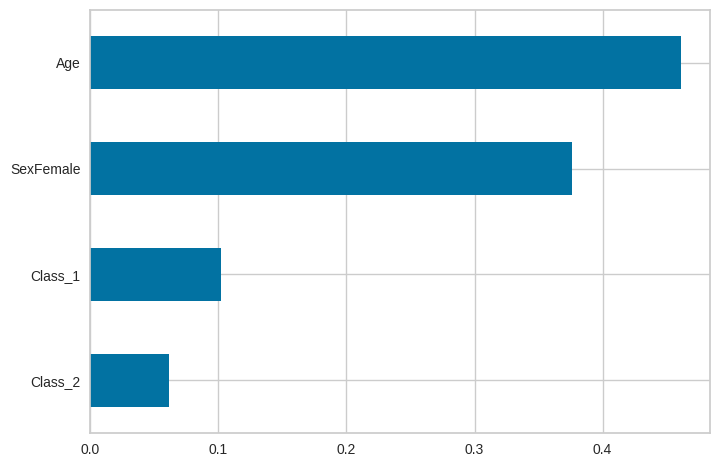

In [7]:
# Análise de importância das variáveis da Randon Forest
importance = pd.Series(mod.feature_importances_, index=x_treino.columns)
importance = importance.sort_values()
importance.plot(kind='barh')

In [8]:
# 5. Previsão em Teste
y_prev = mod.predict(x_teste)

In [9]:
# Matriz comparativa entre Y previsto e Y real em um classificador
# Matriz de Confusão
pd.crosstab(y_prev, y_teste, rownames=['Previsto'], colnames=['Real'])

Real,0,1
Previsto,,
0,111,32
1,17,63


In [10]:
# Métricas de erro de previsão para classificadores
accuracy_score(y_teste, y_prev)

0.7802690582959642

In [11]:
# Precision
precision_score(y_teste, y_prev)

0.7875

In [12]:
# Recall
recall_score(y_teste, y_prev)

0.6631578947368421

# Auto ML
## Automatização de tarefas de ML

In [14]:
# Auto ML - Automatizar tarefas de ML
# pyCaret
# !pip install pycaret
import pandas as pd
from pycaret.classification import *

In [ ]:
# Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

In [15]:
# Setup do conjunto de dados no AutoML - pycaret

s = setup(df, target='Survived')

,Description,Value
0,Session id,8817
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 17)"
5,Transformed train set shape,"(623, 17)"
6,Transformed test set shape,"(268, 17)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,77.3%


In [16]:
s.X_transformed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_Q,Embarked_C,SexFemale,Class_1,Class_2
442,443.0,3.0,0.333714,1.0,25.000000,1.0,0.0,0.333714,7.775000,0.302658,1.0,0.0,0.0,False,False,False
49,50.0,3.0,0.333714,0.0,18.000000,1.0,0.0,0.329210,17.799999,0.302658,1.0,0.0,0.0,True,False,False
193,194.0,2.0,0.463823,1.0,3.000000,1.0,1.0,0.427347,26.000000,0.427347,1.0,0.0,0.0,False,False,True
278,279.0,3.0,0.333714,1.0,7.000000,4.0,1.0,0.319185,29.125000,0.302658,0.0,1.0,0.0,False,False,False
225,226.0,3.0,0.333714,1.0,22.000000,0.0,0.0,0.333714,9.350000,0.302658,1.0,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,818.0,2.0,0.383628,1.0,31.000000,1.0,1.0,0.463823,37.004200,0.302658,0.0,0.0,1.0,False,False,True
599,600.0,1.0,0.383628,1.0,49.000000,1.0,0.0,0.463823,56.929199,0.383628,0.0,0.0,1.0,False,True,False
399,400.0,2.0,0.383628,0.0,28.000000,0.0,0.0,0.383628,12.650000,0.302658,1.0,0.0,0.0,True,False,True
483,484.0,3.0,0.383628,0.0,63.000000,0.0,0.0,0.383628,9.587500,0.302658,1.0,0.0,0.0,True,False,False
